In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [15]:
import torch
import torchvision
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

In [3]:
# Hyper Parameters
sequence_length = 28
input_size = 28
hidden_size = 128
num_layers = 2
num_classes = 10
batch_size = 100
num_epochs = 2
learning_rate = 0.01

In [5]:
# MNIST Dataset
train_dataset = dsets.MNIST(root='./data/',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

test_dataset = dsets.MNIST(root='./data/',
                           train=False,
                           transform=transforms.ToTensor())

In [6]:
# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size=batch_size,
                                         shuffle=False)

In [16]:
# Print MNIST Dataset w/ Data Loader

# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
grids = torchvision.utils.make_grid(images)


torch.Size([3, 392, 242])
14.0
8.642857142857142


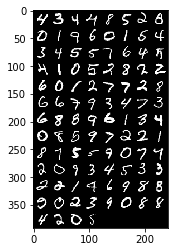

In [31]:
import matplotlib.pyplot as plt
import numpy as np

print(grids.size())
print(grids.size()[1]/28)
print(grids.size()[2]/28)


img = grids

npimg = img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [13]:
print(images.size())
print(type(images))
print(labels.size())
print(type(labels))

torch.Size([100, 1, 28, 28])
<class 'torch.FloatTensor'>
torch.Size([100])
<class 'torch.LongTensor'>


In [ ]:
# RNN Model (Many-to-One)
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, 
                 num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, 
                            num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        # Set initial states